- Assignment-2 
- Naimeesh Narayan Tiwari
- 2020101074
- Science-2

Q1.1.1, Q1.1.2, Q2.1.1, Q2.1.2, Q2.1.3 are in the pdf 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

### Q1.1.3

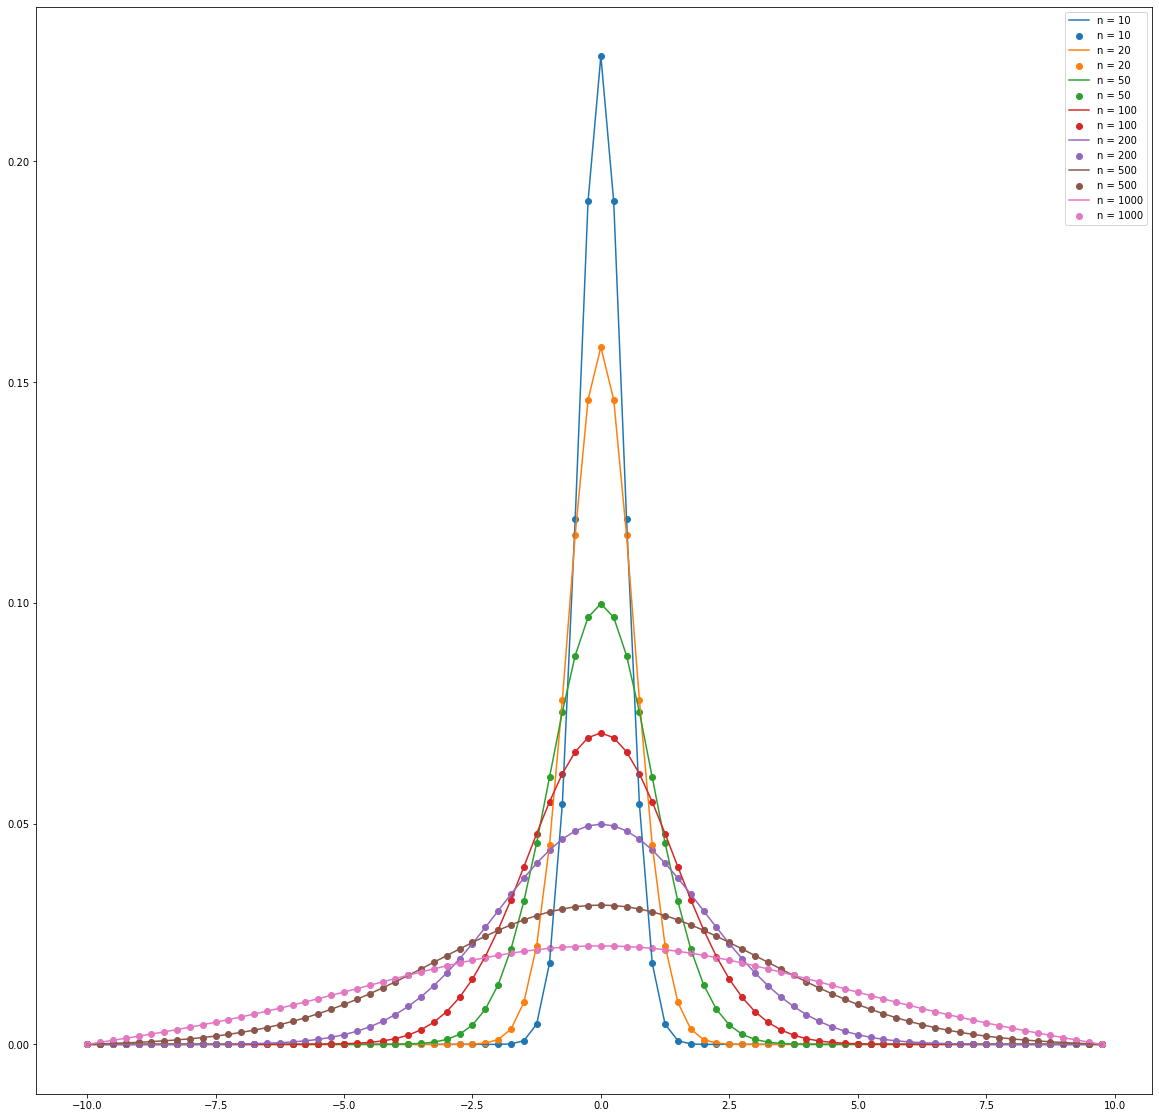

In [2]:
dX = 0.25
dT = 0.01
D = 1
D = D*dT / (dX ** 2)
L = 10
time = 100

t = np.arange(0, time, dT)
X = np.arange(-L, L, dX)

mean = []
mean_sq = []

def plott(n):
    global P
    P = np.array([(1 if x == 0 else 0) for x in X])
    for j in range(n):
        temp = np.zeros(P.shape)
        for i in range(1, len(P) - 1):
            temp[i] = P[i]*(1-2*D) + D*P[i + 1] + D*P[i - 1]
        P = temp


plt.figure(figsize=(20, 20))
plott(10)
plt.plot(X, P, label=f"n = {10}")
plt.scatter(X, P, label=f"n = {10}")
m = np.mean(P*X)
mean.append(m)
mean_sq.append(np.mean(np.square(P*X)))

plott(20)
plt.plot(X, P, label=f"n = {20}")
plt.scatter(X, P, label=f"n = {20}")
m = np.mean(P*X)
mean.append(m)
mean_sq.append(np.mean(np.square(P*X)))

plott(50)
plt.plot(X, P, label=f"n = {50}")
plt.scatter(X, P, label=f"n = {50}")
m = np.mean(P*X)
mean.append(m)
mean_sq.append(np.mean(np.square(P*X)))

plott(100)
plt.plot(X, P, label=f"n = {100}")
plt.scatter(X, P, label=f"n = {100}")
m = np.mean(P*X)
mean.append(m)
mean_sq.append(np.mean(np.square(P*X)))

plott(200)
plt.plot(X, P, label=f"n = {200}")
plt.scatter(X, P, label=f"n = {200}")
m = np.mean(P*X)
mean.append(m)
mean_sq.append(np.mean(np.square(P*X)))

plott(500)
plt.plot(X, P, label=f"n = {500}")
plt.scatter(X, P, label=f"n = {500}")
m = np.mean(P*X)
mean.append(m)
mean_sq.append(np.mean(np.square(P*X)))

plott(1000)
plt.plot(X, P, label=f"n = {1000}")
plt.scatter(X, P, label=f"n = {1000}")
m = np.mean(P*X)
mean.append(m)
mean_sq.append(np.mean(np.square(P*X)))

plt.legend(loc='upper right')
plt.show()


### Q1.1.4

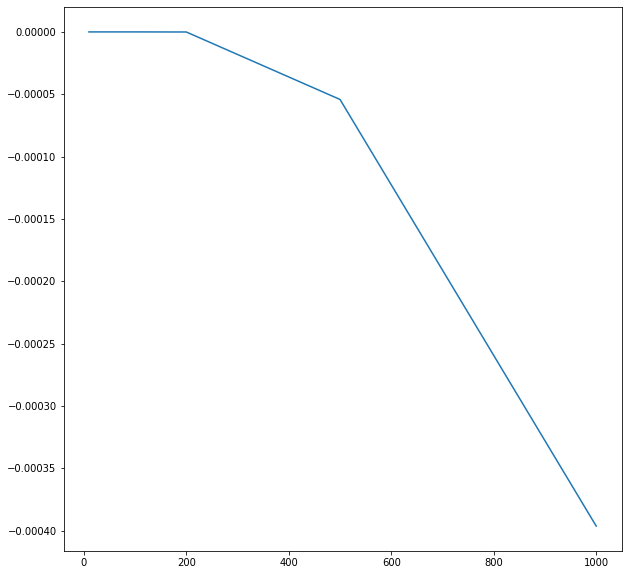

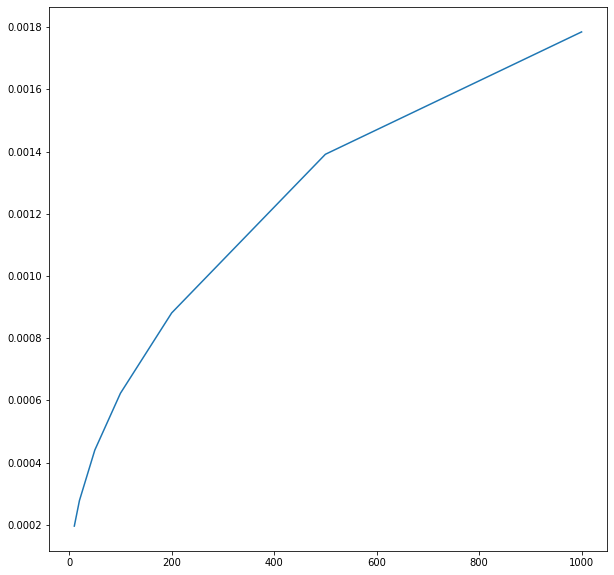

In [3]:
points = [10,20,50,100,200,500,1000]
plt.figure(figsize=(10, 10))
plt.plot(points, mean)
plt.show()
plt.figure(figsize=(10, 10))
plt.plot(points, mean_sq)
plt.show()

### Q1.2.4


In [4]:

plate_length = 10                 
max_iter_time = 101 
disc_center_x = 5
disc_center_y = 5

delta_x = 0.1  
delta_t = 0.005               
D = (delta_x ** 2) / (4* delta_t)
gamma = 0.25

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u = 300.0 * np.ones((101, plate_length, plate_length))

for i in range(1, plate_length-1, delta_x):
    for j in range(1, plate_length-1, delta_x):
        if((disc_center_x-i)*(disc_center_x-i)+(disc_center_y-j)*(disc_center_y-j)<400):
            u[0][i][j] = 700


def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        print(k)
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=300, vmax=700)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)


def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")


TypeError: 'float' object cannot be interpreted as an integer